# Customer Data Visualization with numpy
#### This notebook demonstrates various visualizations of customer purchase data using numpy.


In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import io
import base64
import pandas as pd

#### Data Loading

In [2]:
df = pd.read_csv('shopping_trends.csv')

### Convert relevant columns to NumPy arrays
 

In [3]:
payment_methods = np.array(df['Preferred Payment Method'])
ages = np.array(df['Age'])
purchase_amounts = np.array(df['Purchase Amount (USD)'])
review_ratings = np.array(df['Review Rating'])
frequencies = np.array(df['Frequency of Purchases'])
genders = np.array(df['Gender'])
seasons = np.array(df['Season'])
discount_applied = np.array(df['Discount Applied'])

#### Visualization 1: Average Age by Payment Method

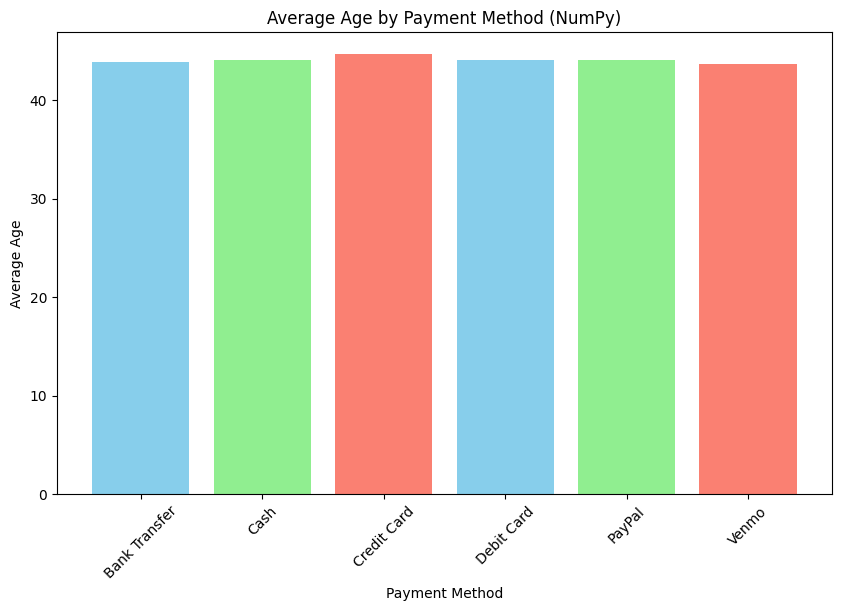

In [4]:
unique_methods = np.unique(payment_methods)
mean_ages = np.zeros(len(unique_methods))
for i, method in enumerate(unique_methods):
    mean_ages[i] = np.mean(ages[payment_methods == method])
plt.figure(figsize=(10, 6))
plt.bar(unique_methods, mean_ages, color=['skyblue', 'lightgreen', 'salmon'])
plt.title('Average Age by Payment Method (NumPy)')
plt.xlabel('Payment Method')
plt.ylabel('Average Age')
plt.xticks(rotation=45)
plt.show()
plt.close()

### Visualization 2: Average Purchase Amount by Category

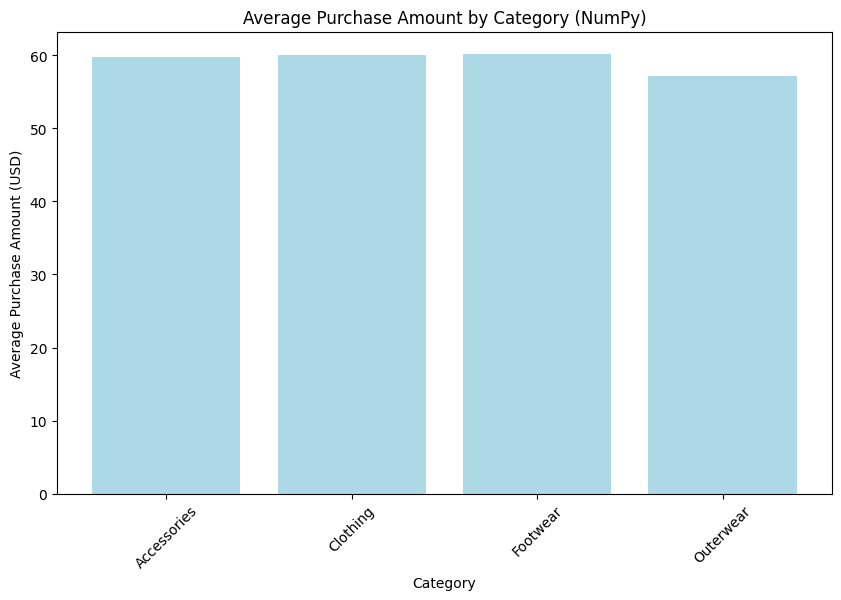

In [5]:
categories = np.unique(df['Category'])
avg_purchase = np.zeros(len(categories))
for i, category in enumerate(categories):
    avg_purchase[i] = np.mean(purchase_amounts[df['Category'] == category])
plt.figure(figsize=(10, 6))
plt.bar(categories, avg_purchase, color='lightblue')
plt.title('Average Purchase Amount by Category (NumPy)')
plt.xlabel('Category')
plt.ylabel('Average Purchase Amount (USD)')
plt.xticks(rotation=45)
plt.show()
plt.close()

### Visualization 3: Discount Application by Category

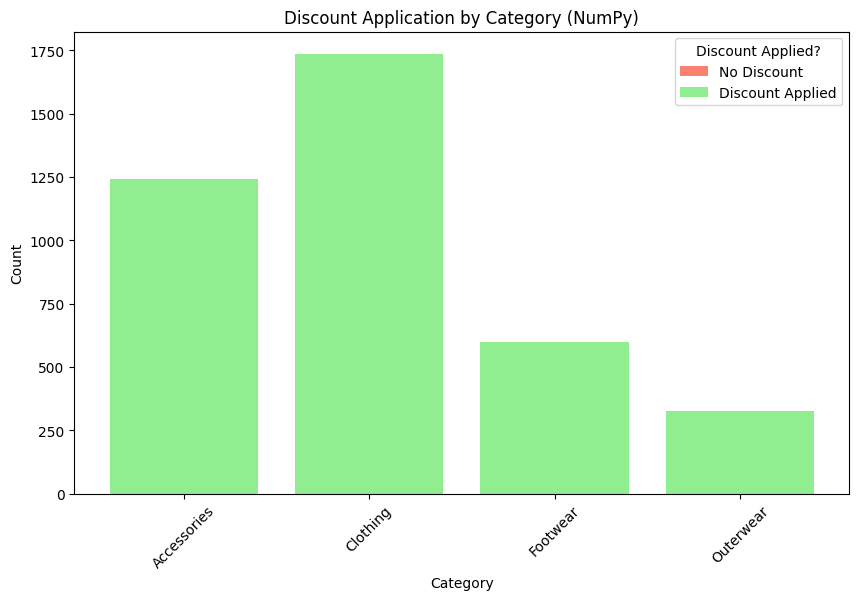

In [6]:
categories_with_discount = np.unique(df['Category'])
discount_counts = np.zeros((len(categories_with_discount), 2))
discount_applied = df['Discount Applied'].astype(bool).values
for i, category in enumerate(categories_with_discount):
    for j, discount in enumerate([False, True]):
        count = np.sum((df['Category'] == category) & (discount_applied == discount))
        discount_counts[i, j] = count
plt.figure(figsize=(10, 6))
plt.bar(categories_with_discount, discount_counts[:, 0], color='salmon', label='No Discount')
plt.bar(categories_with_discount, discount_counts[:, 1], bottom=discount_counts[:, 0], color='lightgreen', label='Discount Applied')
plt.title('Discount Application by Category (NumPy)')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Discount Applied?')
plt.show()
plt.close()

### Visualization 4: Review Rating Distribution

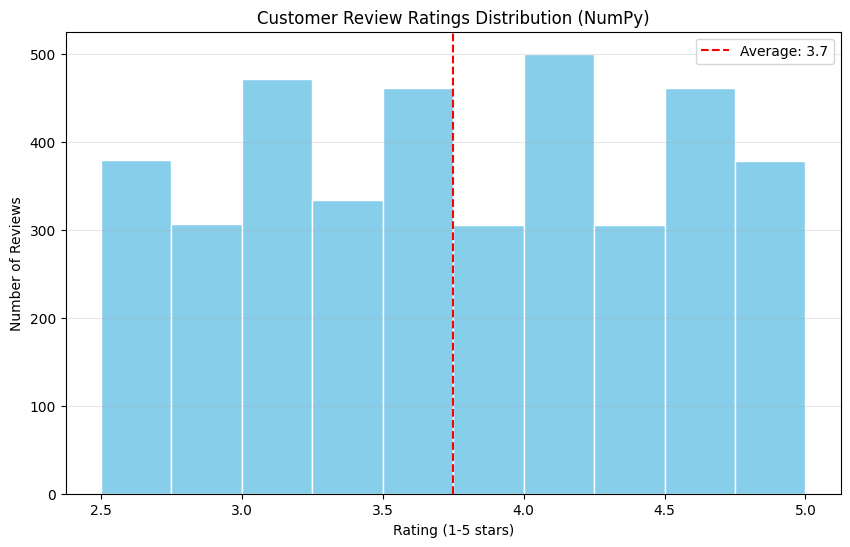

In [7]:
avg_rating = np.mean(review_ratings)
plt.figure(figsize=(10, 6))
plt.hist(review_ratings, bins=10, color='skyblue', edgecolor='white')
plt.axvline(avg_rating, color='red', linestyle='--', label=f'Average: {avg_rating:.1f}')
plt.title('Customer Review Ratings Distribution (NumPy)')
plt.xlabel('Rating (1-5 stars)')
plt.ylabel('Number of Reviews')
plt.legend()
plt.grid(axis='y', alpha=0.3)
plt.show()
plt.close()

### Visualization 5: Purchase Frequency by Gender

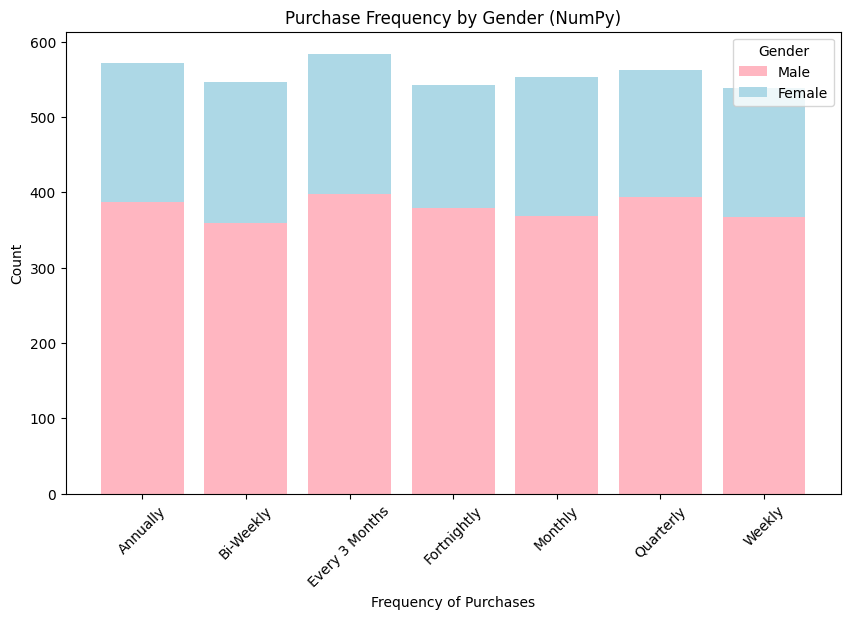

In [8]:
unique_frequencies = np.unique(frequencies)
counts_by_gender = np.zeros((len(unique_frequencies), 2))
for i, freq in enumerate(unique_frequencies):
    for j, gender in enumerate(['Male', 'Female']):
        counts_by_gender[i, j] = np.sum((frequencies == freq) & (genders == gender))
plt.figure(figsize=(10, 6))
plt.bar(unique_frequencies, counts_by_gender[:, 0], color='lightpink', label='Male')
plt.bar(unique_frequencies, counts_by_gender[:, 1], bottom=counts_by_gender[:, 0], color='lightblue', label='Female')
plt.title('Purchase Frequency by Gender (NumPy)')
plt.xlabel('Frequency of Purchases')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Gender')
plt.show()
plt.close()

### Visualization 6: Average Rating by Season

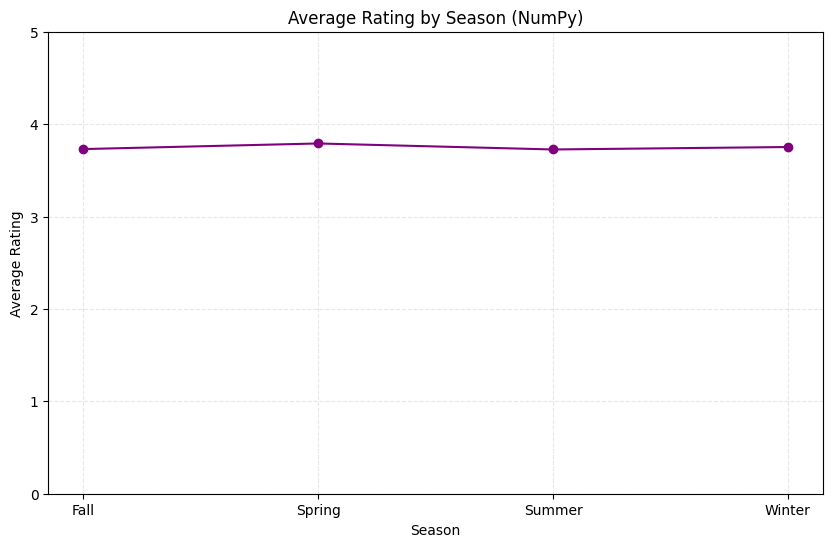

In [9]:
unique_seasons = np.unique(seasons)
avg_ratings_by_season = np.zeros(len(unique_seasons))
for i, season in enumerate(unique_seasons):
    avg_ratings_by_season[i] = np.mean(review_ratings[seasons == season])
plt.figure(figsize=(10, 6))
plt.plot(unique_seasons, avg_ratings_by_season, marker='o', color='purple')
plt.title('Average Rating by Season (NumPy)')
plt.xlabel('Season')
plt.ylabel('Average Rating')
plt.ylim(0, 5) 
plt.grid(True, linestyle='--', alpha=0.3)
plt.show()
plt.close()